### To Fill the missing values.
   
    1. Univariate Imputation : To fill the values if we are taking values from 1 feature only .
    
    SimpleImputator class is available in sklearn library to work with univariate.
    For numerical - mean , median , random value , End of distribution values.
    For categorial  - mode  . 

    2. Multivariate Imputation -  KNN Imputer , Iterative Imputer
    If we are taking values from more than 1 feature to fill the missing values then called as multivariate imputation.
    
### When to use Mean/Median Imputation

    When data is MCAR
    When missing data is less than 5%
   
    
### When to use Mean/Median 

    Use mean : If distribution is normal 
    Use median : If data is skewed.
    
    
### Advantages

    Simple to implement
    
### Disadvantages

    Distribution gets changed.
    Outliers gets added
    Covariance gets changed.



In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("D:/Sandesh/100-days-of-machine-learning/day36-imputing-numerical-data/titanic_toy.csv")
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [3]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

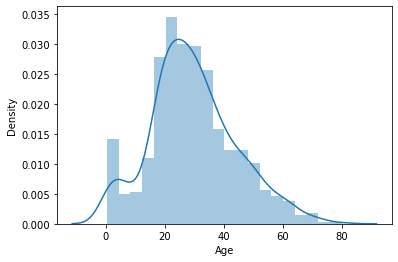

In [5]:
sns.distplot(df['Age'])
plt.show()

In [6]:
df['Age'].skew()

0.38910778230082704

In [4]:
X=df.drop(columns=['Survived'])
y=df[['Survived']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)


In [5]:
mean_age=X_train['Age'].mean()
median_age=X_train['Age'].median()

mean_fare=X_train['Fare'].mean()
median_fare=X_train['Fare'].median()

X_train['Age_mean']=X_train['Age'].fillna(mean_age)
X_train['Age_median']=X_train['Age'].fillna(median_age)

X_train['Fare_mean']=X_train['Fare'].fillna(mean_fare)
X_train['Fare_median']=X_train['Fare'].fillna(median_fare)


In [6]:
X_train

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
301,NaN,23.2500,2,30.166232,29.0,23.2500,23.2500
309,30.0,56.9292,0,30.000000,30.0,56.9292,56.9292
516,34.0,10.5000,0,34.000000,34.0,10.5000,10.5000
120,21.0,73.5000,2,21.000000,21.0,73.5000,73.5000
570,62.0,10.5000,0,62.000000,62.0,10.5000,10.5000
...,...,...,...,...,...,...,...
715,19.0,7.6500,0,19.000000,19.0,7.6500,7.6500
767,30.5,7.7500,0,30.500000,30.5,7.7500,7.7500
72,21.0,73.5000,0,21.000000,21.0,73.5000,73.5000
235,NaN,7.5500,0,30.166232,29.0,7.5500,7.5500


### After Imputing with mean , median , check the below things.

1. Variance
2. Distribution 
3. Correlation , Covariance
4. Draw Boxplot 


### 1. Check whether the variance is changed or not 

In [7]:
print("Before variance for age ",X_train['Age'].var())
print("After variance",X_train['Age_mean'].var())
print("After variance",X_train['Age_median'].var())


print("\nBefore variance for fare ",X_train['Fare'].var())
print("After variance",X_train['Fare_mean'].var())
print("After variance",X_train['Fare_median'].var())

# Before variance and after variance the values should be change too much.
# If there is too much change then it is a red flag.


Before variance for age  220.7125508594779
After variance 176.0112747360393
After variance 176.23102602680237

Before variance for fare  2179.2211148474044
After variance 2065.81579663453
After variance 2080.7804077558935


### 2. Check the distribution as well 

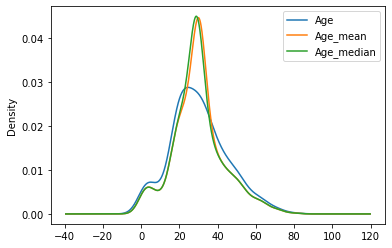

In [8]:
fig=plt.figure()
ax=fig.add_subplot(111)

X_train['Age'].plot(kind='kde')

X_train['Age_mean'].plot(kind='kde')

X_train['Age_median'].plot(kind='kde')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

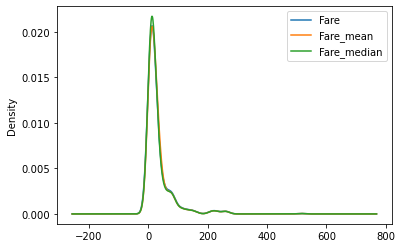

In [9]:
fig=plt.figure()
ax=fig.add_subplot(111)

X_train['Fare'].plot(kind='kde')

X_train['Fare_mean'].plot(kind='kde')

X_train['Fare_median'].plot(kind='kde')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

### 3.Check the co-variance 

In [10]:
X_train.corr()

# check with respect to age and fare before and after there should not be 
# too much changes.

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,1.000000,0.109163,-0.283794,1.000000,1.000000,0.106805,0.106628
Fare,0.109163,1.000000,0.253653,0.102470,0.105678,1.000000,1.000000
Family,-0.283794,0.253653,1.000000,-0.238561,-0.236312,0.248874,0.246911
Age_mean,1.000000,0.102470,-0.238561,1.000000,0.999376,0.100227,0.100142
Age_median,1.000000,0.105678,-0.236312,0.999376,1.000000,0.103366,0.103153
Fare_mean,0.106805,1.000000,0.248874,0.100227,0.103366,1.000000,0.996398
Fare_median,0.106628,1.000000,0.246911,0.100142,0.103153,0.996398,1.000000


In [11]:
X_train.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,220.712551,80.290359,-5.974166,220.712551,220.712551,75.785411,75.994880
Fare,80.290359,2179.221115,17.962001,63.754196,65.792314,2179.221115,2179.221115
Family,-5.974166,17.962001,2.265902,-4.764208,-4.722243,17.027269,16.954058
Age_mean,220.712551,63.754196,-4.764208,176.011275,176.011275,60.436467,60.603512
Age_median,220.712551,65.792314,-4.722243,176.011275,176.231026,62.368522,62.464631
Fare_mean,75.785411,2179.221115,17.027269,60.436467,62.368522,2065.815797,2065.815797
Fare_median,75.994880,2179.221115,16.954058,60.603512,62.464631,2065.815797,2080.780408


### 4. BoxPlot 

<AxesSubplot:>

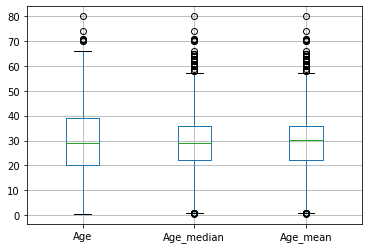

In [12]:
X_train[['Age','Age_median','Age_mean']].boxplot()

# there is major changes 


<AxesSubplot:>

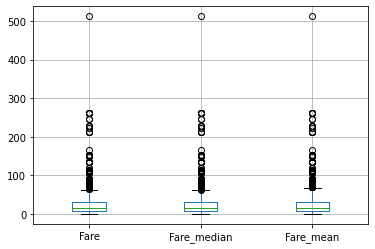

In [13]:
X_train[['Fare','Fare_median','Fare_mean']].boxplot()

# there is no changes .


### For Ages we cannot impute as it is giving bad results for all options , but for fare we can go with imputation 

### SECOND APPROACH

### Using  Sklearn 

- We can pass diff imputer to diff features using sklearn simple imputer and column transformer


In [14]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)


In [15]:
imputer1=SimpleImputer(strategy='median')
imputer2=SimpleImputer(strategy='mean')

trf=ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare']),
],remainder= 'passthrough')


trf.fit(X_train)


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [16]:
X_train=trf.transform(X_train)
X_test=trf.transform(X_test)
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])

In [17]:

# median value

trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [18]:

# mean value 

trf.named_transformers_['imputer2'].statistics_


array([32.61759689])

### THE END